비디오로 부터 이미지 프레임 추출 전처리기 (preprocessing) 

* 참고: https://github.com/SBoyNumber1/LSTM-video-classification

In [1]:
import socket
hostname = socket.gethostname()
print(hostname)

spacegray


* 구동환경 확인 및 Colab 대응

In [2]:
#https://stackoverflow.com/a/53586419
import sys
IN_COLAB = 'google.colab' in sys.modules
print(IN_COLAB)

False


In [3]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import os
    os.chdir('/content/drive/My Drive/Colab Notebooks')

* 라이브러리 import 

In [4]:
# https://github.com/SBoyNumber1/LSTM-video-classification

"""
After moving all the files using the 1_ file, we run this one to extract
the images from the videos and also create a data file we can use
for training and testing later.
"""
import csv
import glob
import os
import os.path
import sys
from subprocess import call
import numpy as np

* 설정 및 폴더 탐색

In [5]:
folders = 'data/'
extenssion = 'mp4'
split_ratio = 0.7 # train / validation split
nb_frames = []
data_file_all = []
data_file_train = []
data_file_validation = []
nb_files_per_class = []
labels = []

In [6]:
class_folders = sorted(glob.glob(os.path.join(folders, '*')))
print(class_folders)

['data/A004', 'data/A005', 'data/A011', 'data/A016', 'data/A020', 'data/A027', 'data/A031', 'data/A039', 'data/A048', 'data/A052', 'data/A054', 'data/A055']


In [7]:
outDir = 'data_extracted'

In [8]:
def get_video_parts(video_path):
    """Given a full path to a video, return its parts."""
    parts = video_path.split(os.path.sep)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]

    return train_or_test, classname, filename_no_ext, filename

def get_nb_frames_for_video(video_parts):
    """Given video parts of an (assumed) already extracted video, return
    the number of frames that were extracted."""
    train_or_test, classname, filename_no_ext, _ = video_parts
    generated_files = glob.glob(os.path.join(ext_path, '*.jpg'))
    return len(generated_files)

In [9]:
for vid_class in class_folders:
    class_files = glob.glob(os.path.join(vid_class, '*.' + extenssion))
    nb_files_per_class.append(len(class_files))
    
    labels_temp = vid_class.split(os.path.sep)
    labels.append([labels_temp[1]])

    cnt = 0 # to split train/validation
    
    for video_path in class_files:

        video_parts = get_video_parts(video_path)

        folder, classname, filename_no_ext, filename = video_parts

        folder_img = os.path.join(outDir, 'data')#'data_extracted_20211104/data'

        if not os.path.exists(folder_img):
            os.makedirs(folder_img)
        #print(folder_img)
        
        target_vid = os.path.join(folder, classname, filename)
        ext_path = os.path.join(folder_img, filename_no_ext)
        if not os.path.exists(ext_path):
            os.makedirs(ext_path)
            print(ext_path, "created")
            target_img = os.path.join(ext_path, "%04d.jpg")
            call(["ffmpeg", "-i", target_vid, target_img]) 

        frames = get_nb_frames_for_video(video_parts)
        nb_frames.append(frames)
        
        #data_file_temp.append([filename_no_ext + ';' + classname])
        data_file_all.append([filename_no_ext + ';' + classname])
        
        if cnt < int(len(class_files) * split_ratio):
            data_file_train.append([filename_no_ext + ';' + classname])
        else:
            data_file_validation.append([filename_no_ext + ';' + classname])
        
        cnt += 1
        
with open(outDir+'/data_all.csv', 'w') as fout:
    writer = csv.writer(fout)
    writer.writerows(data_file_all)
    
with open(outDir+'/train.csv', 'w') as fout:
    writer = csv.writer(fout)
    writer.writerows(data_file_train)
    
with open(outDir+'/validation.csv', 'w') as fout:
    writer = csv.writer(fout)
    writer.writerows(data_file_validation)    
    
with open(outDir+'/labels.csv', 'w') as fout:
    writer = csv.writer(fout)
    writer.writerows(labels)    

data_extracted/data/A004_P048_G001_C001_1119 created
data_extracted/data/A004_P050_G001_C001_1167 created
data_extracted/data/A004_P001_G001_C001_1 created
data_extracted/data/A004_P046_G001_C001_1071 created
data_extracted/data/A004_P015_G001_C001_327 created
data_extracted/data/A004_P041_G001_C001_951 created
data_extracted/data/A004_P013_G001_C001_279 created
data_extracted/data/A004_P020_G001_C001_447 created
data_extracted/data/A004_P012_G001_C001_255 created
data_extracted/data/A004_P031_G001_C001_711 created
data_extracted/data/A004_P009_G001_C001_183 created
data_extracted/data/A004_P017_G001_C001_375 created
data_extracted/data/A004_P025_G001_C001_567 created
data_extracted/data/A004_P024_G001_C001_543 created
data_extracted/data/A004_P014_G001_C001_303 created
data_extracted/data/A004_P038_G001_C001_879 created
data_extracted/data/A004_P030_G001_C001_687 created
data_extracted/data/A004_P049_G001_C001_1143 created
data_extracted/data/A004_P043_G001_C001_999 created
data_extra

data_extracted/data/A016_P005_G001_C001_87 created
data_extracted/data/A016_P028_G001_C001_639 created
data_extracted/data/A016_P013_G001_C001_279 created
data_extracted/data/A016_P040_G001_C001_927 created
data_extracted/data/A016_P003_G001_C001_39 created
data_extracted/data/A016_P039_G001_C001_903 created
data_extracted/data/A016_P045_G001_C001_1047 created
data_extracted/data/A016_P009_G001_C001_183 created
data_extracted/data/A016_P030_G001_C001_687 created
data_extracted/data/A016_P023_G001_C001_519 created
data_extracted/data/A016_P037_G001_C001_855 created
data_extracted/data/A016_P011_G001_C001_231 created
data_extracted/data/A016_P015_G001_C001_327 created
data_extracted/data/A016_P048_G001_C001_1119 created
data_extracted/data/A016_P020_G001_C001_447 created
data_extracted/data/A016_P049_G001_C001_1143 created
data_extracted/data/A016_P041_G001_C001_951 created
data_extracted/data/A016_P046_G001_C001_1071 created
data_extracted/data/A016_P031_G001_C001_711 created
data_extra

data_extracted/data/A031_P044_G001_C001_1024 created
data_extracted/data/A031_P015_G001_C001_336 created
data_extracted/data/A031_P024_G001_C001_552 created
data_extracted/data/A031_P041_G001_C001_952 created
data_extracted/data/A031_P009_G001_C001_192 created
data_extracted/data/A031_P050_G001_C001_1168 created
data_extracted/data/A031_P013_G001_C001_288 created
data_extracted/data/A031_P023_G001_C001_528 created
data_extracted/data/A031_P025_G001_C001_576 created
data_extracted/data/A031_P039_G001_C001_904 created
data_extracted/data/A031_P034_G001_C001_792 created
data_extracted/data/A031_P022_G001_C001_504 created
data_extracted/data/A031_P021_G001_C001_480 created
data_extracted/data/A031_P010_G001_C001_216 created
data_extracted/data/A031_P002_G001_C001_25 created
data_extracted/data/A031_P006_G001_C001_120 created
data_extracted/data/A031_P007_G001_C001_144 created
data_extracted/data/A031_P012_G001_C001_264 created
data_extracted/data/A031_P018_G001_C001_408 created
data_extrac

data_extracted/data/A052_P011_G001_C001_159 created
data_extracted/data/A052_P010_G001_C001_143 created
data_extracted/data/A052_P024_G001_C001_367 created
data_extracted/data/A052_P018_G001_C001_271 created
data_extracted/data/A052_P050_G001_C001_783 created
data_extracted/data/A052_P023_G001_C001_351 created
data_extracted/data/A052_P033_G001_C001_511 created
data_extracted/data/A052_P006_G001_C001_79 created
data_extracted/data/A052_P012_G001_C001_175 created
data_extracted/data/A052_P030_G001_C001_463 created
data_extracted/data/A052_P009_G001_C001_127 created
data_extracted/data/A052_P007_G001_C001_95 created
data_extracted/data/A052_P002_G001_C001_17 created
data_extracted/data/A052_P049_G001_C001_767 created
data_extracted/data/A052_P003_G001_C001_32 created
data_extracted/data/A052_P041_G001_C001_639 created
data_extracted/data/A052_P019_G001_C001_287 created
data_extracted/data/A052_P013_G001_C001_191 created
data_extracted/data/A052_P038_G001_C001_591 created
data_extracted/d

In [10]:
print(np.min(nb_frames))
print(np.max(nb_frames))
print(np.mean(nb_frames))

18
471
184.31375838926175


In [11]:
len(nb_frames)

596

In [12]:
data_file_all[0]

['A004_P048_G001_C001_1119;A004']

In [13]:
nb_files_per_class

[50, 50, 50, 50, 50, 50, 49, 50, 49, 49, 50, 49]

In [14]:
x = np.arange(len(nb_files_per_class))

In [15]:
labels[0][0]

'A004'

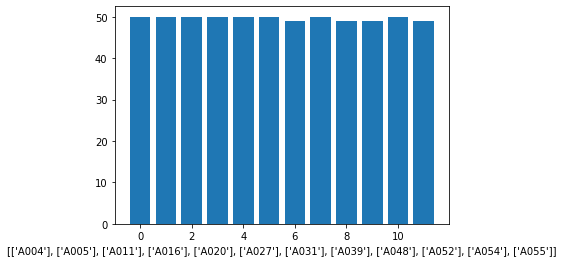

In [18]:
import matplotlib.pyplot as plt
plt.bar(x, nb_files_per_class)
plt.xlabel(labels)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
index = np.arange(len(nb_files_per_class))
_= plt.bar(index, nb_files_per_class)